### Model generation and simulation

This notebook shows a small example of defining a template-based model, compiling it into a generic executable model form, and finally, into an ODE model. The ODE model is then simulated with a given initial condition and parameterization.

In [5]:
import numpy
import matplotlib.pyplot as plt

from mira.metamodel import *
from mira.modeling import Model
from mira.modeling.ode import OdeModel, simulate_ode_model

### We define a simple SIR-like model using templates

In [ ]:
template_model = TemplateModel(templates=
    [
        NaturalConversion(
            subject=Concept(name='infected'),
            outcome=Concept(name='recovered')
        ),
        ControlledConversion(
            subject=Concept(name='susceptible'),
            outcome=Concept(name='infected'),
            controller=Concept(name='infected')
        )
    ]
)

We first create a generic executable `Model` and then an `OdeModel` from this latter model.

In [6]:
model = Model(template_model)
ode_model = OdeModel(model)

We now simulate the system for a given time span, initial conditions, and parameterization.

In [9]:
times = numpy.linspace(0, 25, 100)

res = simulate_ode_model(
    ode_model=ode_model,
    initials=numpy.array([0.01, 0, 0.99]),
    parameters={('infected', 'recovered', 'NaturalConversion', 'rate'): 0.5,
                ('susceptible', 'infected', 'infected', 'ControlledConversion', 'rate'): 1.1},
    times=times
)

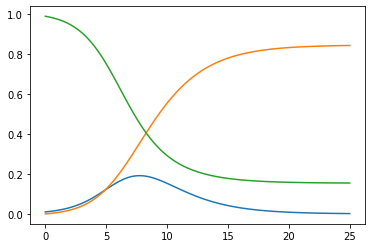

In [10]:
plt.plot(times, res)